In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing required packages**

In [ ]:
!pip install stellargraph

     |████████████████████████████████| 440kB 24.4MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stellargraph
from stellargraph import StellarGraph
from stellargraph import datasets

In [ ]:
data = datasets.Cora()
Graph, labels = data.load()
Graph.info()

'StellarGraph: Undirected multigraph\n Nodes: 2708, Edges: 5429\n\n Node types:\n  paper: [2708]\n    Features: float32 vector, length 1433\n    Edge types: paper-cites->paper\n\n Edge types:\n    paper-cites->paper: [5429]\n        Weights: all 1 (default)\n        Features: none'

In [ ]:
len(Graph.nodes())

2708

In [ ]:
random_walk=stellargraph.data.BiasedRandomWalk(Graph)

Nodes_walks= random_walk.run(
    nodes=Graph.nodes(),  
    length=50, 
    n=10,  
    p=0.5,  
    q=1.0,  
    weighted=True,  
    seed=42,  
)

In [ ]:
print(labels)

31336             Neural_Networks
1061127             Rule_Learning
1106406    Reinforcement_Learning
13195      Reinforcement_Learning
37879       Probabilistic_Methods
                    ...          
1128975        Genetic_Algorithms
1128977        Genetic_Algorithms
1128978        Genetic_Algorithms
117328                 Case_Based
24043             Neural_Networks
Name: subject, Length: 2708, dtype: object


# **Training Word2Vec model**

In [ ]:
for i in range(len(Nodes_walks)):
  for j in range(len(Nodes_walks[0])):
    Nodes_walks[i][j]=str(Nodes_walks[i][j])


In [ ]:
from gensim.models import Word2Vec
W2V = Word2Vec(Nodes_walks, size=100, window=5, min_count=0, sg=1, workers=2, iter=2)

In [ ]:
nodes=W2V.wv.index2word

In [ ]:
y=[]
for node in nodes:
  y.append(labels[int(node)])


In [ ]:
number_of_classes=len(set(y))

In [ ]:
# embedding of words
Word_embedding=W2V.wv.vectors

In [ ]:
Word_embedding.shape

(2708, 100)

In [ ]:
target_map={}
c=0
for i in set(y):
  target_map[i]=c
  c=c+1

In [ ]:

for i in range(len(y)):
  y[i]=target_map[y[i]]



In [ ]:
X=W2V.wv.vectors

# **Visualisations**

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=500, random_state=23)
values = tsne_model.fit_transform(X)



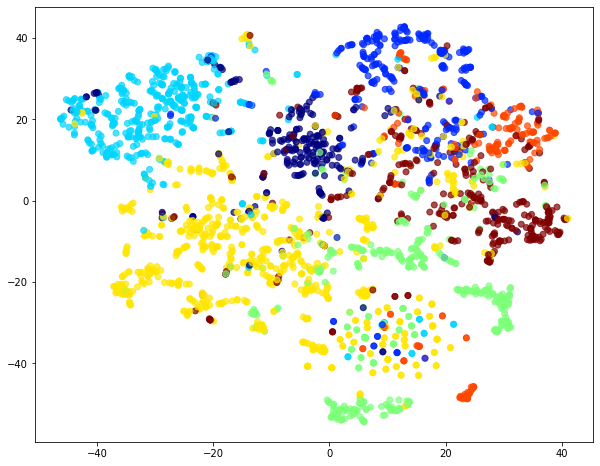

In [ ]:
x1 = []
x2= []
for value in values:
    x1.append(value[0])
    x2.append(value[1])
    
alpha = 0.7
# map = {l: i for i, l in enumerate(np.unique(y))}
# colours = [map[t] for t in y]

plt.figure(figsize=(10, 8))
plt.scatter(
    x1,
    x2,
    c=y,
    cmap="jet",
    alpha=alpha,
)

# **Classifications of Nodes using above represenattions**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=None)

In [ ]:
#training the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=100).fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#accuracy on training data
print("accuracy on training set",clf.score(X_train,y_train))

accuracy on training set 0.8557360905957656


In [ ]:
#accuracy on training data
print("accuracy on testing set",clf.score(X_test,y_test))

accuracy on testing set 0.8183161004431314


# **Classification using one hot vector represenatations**

In [ ]:

data=[]
for i in range(len(Graph.nodes())):
  t=[0]*len(Graph.nodes())
  t[i]=1
  data.append(t)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X=pca.transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=None)

In [ ]:
#training the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=100).fit(X_train, y_train)


In [ ]:
#accuracy on training data
print("accuracy on training set",clf.score(X_train,y_train))

accuracy on training set 0.3023141309699655


In [ ]:
#accuracy on training data
print("accuracy on testing set",clf.score(X_test,y_test))

accuracy on testing set 0.30132939438700146


References
[Node classification with Node2Vec](https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-node-classification.html)

[Node2Vec-Github](https://github.com/eliorc/node2vec)



